The following code imports the matplotlib.pyplot package to give us the ability to create charts. Numpy is imported to allow us to process the data using matricies. Pandas is imported to allow us to place the data into a dataframe. The dataframe allows the data to be filtered. Scipy is imported to allow us to determine the hypogeometric p-value. The LinearSegmentedColormap to color the plots. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy import linalg
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
from scipy.special import comb

The following code reads in all of the gene data for both Marko's and Austin's computer.

In [2]:
gene_rpkm=pd.read_csv("/Users/markomiholjcic/Documents/GitHub/DataScienceBME6900Project/alan brain atlas data/mouse visual cortex cellular taxonomy/genes_rpkm.csv")
gene_rpkm=gene_rpkm.transpose()
gene_rpkm.shape

(1680, 24057)

The following code places the labels as the column headers of the dataframe. 

In [ ]:
gene_rpkm=pd.read_csv(r"C:\Users\austi\Documents\GitHub\DataScienceBME6900Project\alan brain atlas data\mouse visual cortex cellular taxonomy\genes_rpkm.csv")
gene_rpkm=gene_rpkm.transpose()
gene_rpkm.shape

In [3]:
new_header = gene_rpkm.iloc[0]
gene_rpkm = gene_rpkm[1:]
gene_rpkm.columns = new_header

The following code reads in the cell data both Marko's and Austin's computer. 

In [ ]:
cellmeta=pd.read_csv(r"C:\Users\austi\Documents\GitHub\DataScienceBME6900Project\alan brain atlas data\mouse visual cortex cellular taxonomy\cell_metadata.csv")
cellmeta.shape

In [4]:
cellmeta=pd.read_csv("/Users/markomiholjcic/Documents/GitHub/DataScienceBME6900Project/alan brain atlas data/mouse visual cortex cellular taxonomy/cell_metadata.csv")
cellmeta.shape

(1678, 16)

In [5]:
#selects the excitatory cells
excitatory_meta=cellmeta.loc[cellmeta['major_class']=='Excitatory']

#selects the inhibatory cells
inhib_meta = cellmeta.loc[cellmeta['major_class']=='Inhibitory']

ex_in_meta = pd.DataFrame()

# creates the matrix wiht inhibatory cells and excitatory cells
ex_in_meta = excitatory_meta.append(inhib_meta)

# the following code determines the index that corresponds with
# the excitatory group and the inhibatory group
ex_in_meta
ex_index = excitatory_meta.index
ex_length = len(ex_index) - 1
print("Excitatory is from 0-", ex_length, "index")

inhib_index = inhib_meta.index
inhib_length = len(inhib_index)
inhib_max_index = ex_length + inhib_length
print("Inhibitatory is from:", ex_length+1, "-", inhib_max_index)

Excitatory is from 0- 755 index
Inhibitatory is from: 756 - 1516


The following code places the Excitatory and Inhibatory cells and their respective genes into a dataframe.

In [6]:
ex_inhib_rpkm =gene_rpkm.loc[ex_in_meta["long_name"]]

ex_inhib_rpkm = ex_inhib_rpkm.apply(pd.to_numeric)

ex_inhib_rpkm = ex_inhib_rpkm.to_numpy()

ex_inhib_rpkm = np.transpose(ex_inhib_rpkm)
ex_inhib_rpkm.shape

(24057, 1517)

The following code creates the colormap for the plots. The colors chosen are lawn green, black, and red. They are placed in this order to assign negative values to green, positive values to red, and near zero values to black.

In [7]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

The following code plots the data.

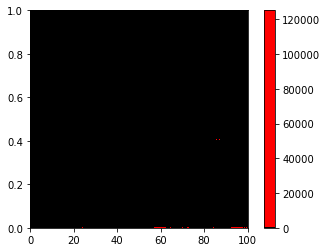

In [8]:
img = plt.imshow(ex_inhib_rpkm, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

The following code perfroms the Singular Value Decomposition on the selected data.

In [9]:
#SVD
U, s, vT = svd(ex_inhib_rpkm)

count = 0 

# this loop finds the amount of values in the sigma matrix and counts 
# how many elements are 0.
for i in range(len(s)):
    if s[i] < 0.00001:
        count = count + 1

# this calculation determines the rank of the matrix
# it subtracts the amount of zeros from the number of columns
rank = ex_inhib_rpkm.shape[1] - count
rank

1517

The Rank is 1517.
The following code checks the dimensions of the U matrix.

In [10]:
U.shape

(24057, 24057)

This code dots U with the transpose of U. If U dotted with its transpose is equal to the identity matrix, then the columns of U are orthogonal and normalized.

In [11]:
# This is the dot product between U and U transpose
test = U.dot(np.transpose(U))

# This creates the identity matrix
identity_matrix = np.identity(len(U[:,1]))

# This checks if the identity matrix is equal to the dot product
# between U and U transpose that is calculated and stored in variable
# 'test'
np.allclose(test, identity_matrix, atol=1e-8)

True

U is orthogonal and normalized.

The following code checks the dimensions of the V transpose matrix.

In [12]:
vT.shape

(1517, 1517)

This code dots V transpose with the transpose of V transpose. If V transpose dotted with its transpose is equal to the identity matrix, then the rows of V transpose are orthogonal and normalized.

In [13]:
# This is the dot product between V transpose and the transpose of 
# V transpose
test = vT.dot(np.transpose(vT))

# This creates the identity matrix
identity_matrix = np.identity(len(vT[:,1]))

# This checks if the identity matrix is equal to the dot product
# between V transpose and the transpose of V transpose 
# that is calculated and stored in variable 'test'
np.allclose(test, identity_matrix, atol=1e-08)

True

This computes the singular value decomposition with the rank

In [10]:
#SVD
U, s, VT = svd(ex_inhib_rpkm)

# U matrix with the rank
U = U[:, :rank]

# Creates a vector of 0 with values along the diagonal
sigma = diag(s)

# creates sigma matrix with rank
sigma = sigma[:rank, :rank]
#creates V transpose matrix with rank
VT = VT[:rank, :]

This checks the shape of the U matrix

In [15]:
U.shape

(24057, 1517)

This checks the shape of the sigma matrix

In [16]:
sigma.shape

(1517, 1517)

This checks the shape of the v transpose matrix

In [17]:
VT.shape

(1517, 1517)

Calculates the dot product between U, S, and V transpose and determines if the value is equal to the original matrix.

In [18]:
# U dot with sigma
uDotS = U.dot(sigma)
# The product of U dot with sigma is dotted with V transpose
uDotSDotVt = uDotS.dot(VT)

# Subtract the product of U, sigma, and V transpose 
# from the original matrix
testSVD = np.round(abs(ex_inhib_rpkm - uDotSDotVt))
testSVD = np.matrix(testSVD)
# If the resulting matrix is filled with only zeros, then 
# the product of U, sigma, and V transpose are equal to the 
# original matrix
if (testSVD.all() == 0):
    zero = True
zero

True

In [29]:
# This is the dot product between V transpose and the transpose of 
# V transpose
test = vT.dot(np.transpose(vT))

# This creates the identity matrix
identity_matrix = np.identity(len(vT[:,1]))

# This checks if the identity matrix is equal to the dot product
# between V transpose and the transpose of V transpose 
# that is calculated and stored in variable 'test'
np.allclose(test, identity_matrix, atol=1e-08)

True

The resulting matrix is equal to the matrix of zeros. Therefore, the resulting matrix is equal to the original matrix.

The following code plots martrix VT. The green indicates negative values, black is equal to 0, while red indicates positive values. This colorscheme is created using the LinearSegmentedColormap

In [11]:
gBR2 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red', 
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red', 
       'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red',
       'Red', 'Red', 'Red', 'Red', 'Red','Red', 'Red')
gBRmap2 = LinearSegmentedColormap.from_list("mycmap", gBR2)

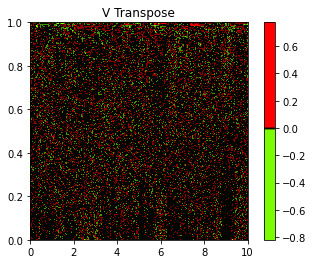

In [12]:
img = plt.imshow(VT, cmap=gBRmap2, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap2)

The following code plots the top 16 patterns in VT. 

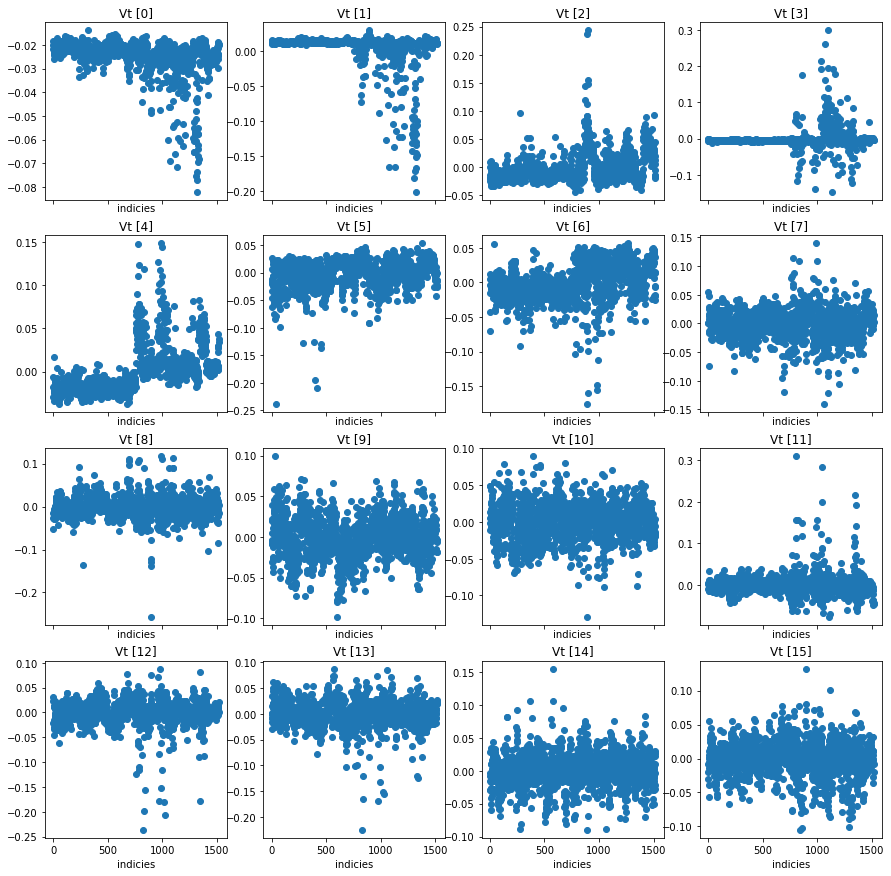

In [13]:
vx = np.arange(0,VT.shape[0],1)

fig, axs = plt.subplots(4, 4, figsize=(15,15), sharex='all')

for i in range(4):
    for k in range(4):
        axs[i, k].scatter(vx, VT[(4*i)+k,:])
        num = str((4*i)+k)
        axs[i, k].set_title('Vt ['+num+']')

# sets the x axis
for ax in axs.flat:
    ax.set(xlabel='indicies')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()
    

Finding outliers

In [86]:
v4 = VT[4,:]

index = []

for i in range(len(v4)):
    if (v4[i] > 0.04):
        number = i
        index.append(number)
        
index

[756,
 757,
 758,
 759,
 761,
 762,
 764,
 766,
 767,
 768,
 770,
 771,
 772,
 773,
 774,
 775,
 778,
 779,
 781,
 783,
 784,
 785,
 786,
 787,
 788,
 789,
 790,
 792,
 801,
 809,
 812,
 813,
 818,
 820,
 827,
 828,
 829,
 832,
 836,
 840,
 848,
 851,
 953,
 956,
 957,
 963,
 964,
 970,
 971,
 975,
 977,
 979,
 981,
 984,
 986,
 987,
 989,
 990,
 991,
 992,
 995,
 997,
 998,
 999,
 1000,
 1002,
 1004,
 1006,
 1007,
 1012,
 1013,
 1015,
 1016,
 1017,
 1018,
 1019,
 1021,
 1022,
 1023,
 1024,
 1025,
 1027,
 1028,
 1034,
 1036,
 1038,
 1040,
 1043,
 1047,
 1048,
 1054,
 1107,
 1113,
 1242,
 1275,
 1282,
 1283,
 1285,
 1333,
 1334,
 1336,
 1337,
 1338,
 1339,
 1340,
 1341,
 1343,
 1346,
 1347,
 1348,
 1349,
 1351,
 1352,
 1353,
 1355,
 1356,
 1357,
 1358,
 1359,
 1361,
 1363,
 1364,
 1365,
 1366,
 1367,
 1370,
 1372,
 1373,
 1374,
 1375,
 1376,
 1377,
 1378,
 1379,
 1380,
 1381,
 1382,
 1383,
 1384,
 1394,
 1395,
 1396,
 1398,
 1511]

In [88]:
gene_names = gene_rpkm.iloc[0]

names = []

for i in range(len(index)):
    name = gene_names.index[index[i]]
    names.append(name)
    
names

['2310079F23Rik',
 '2310079G19Rik',
 '2310081J21Rik',
 '2400001E08Rik',
 '2400009B08Rik',
 '2410001C21Rik',
 '2410002I01Rik',
 '2410003K15Rik',
 '2410003L11Rik',
 '2410004A20Rik',
 '2410004I01Rik',
 '2410004N09Rik',
 '2410004P03Rik',
 '2410006H16Rik',
 '2410007B07Rik',
 '2410012E07Rik',
 '2410016O06Rik',
 '2410017I17Rik',
 '2410018L13Rik',
 '2410021H03Rik',
 '2410022L05Rik',
 '2410042D21Rik',
 '2410057H14Rik',
 '2410066E13Rik',
 '2410075B13Rik',
 '2410076I21Rik',
 '2410088K16Rik',
 '2410091C18Rik',
 '2500004C02Rik',
 '2510049J12Rik',
 '2610002D18Rik',
 '2610002I17Rik',
 '2610015P09Rik',
 '2610017I09Rik',
 '2610027L16Rik',
 '2610028E06Rik',
 '2610028H24Rik',
 '2610034B18Rik',
 '2610037D02Rik',
 '2610101N10Rik',
 '2610305D13Rik',
 '2610316D01Rik',
 '3010001F23Rik',
 '3110001D03Rik',
 '3110001I22Rik',
 '3110015C05Rik',
 '3110021A11Rik',
 '3110043O21Rik',
 '3110045C21Rik',
 '3110056O03Rik',
 '3110062M04Rik',
 '3110079O15Rik',
 '3110082I17Rik',
 '3200001D21Rik',
 '3230401D17Rik',
 '3300002I

Significant Patterns

In [30]:
arr = []

for i in range(50):
    v = VT[i,:]
    
    inhib = v[0:755]
    excit = v[756:1516]

    stat = stats.mannwhitneyu(inhib,excit)[1]
    
    if (stat < 0.01):
        print(stat)
        arr.append(i)

arr

7.476933196782096e-66
1.706831374254972e-24
3.7319248923159316e-26
9.464113674947324e-66
3.210550053086477e-235
1.8312644126550203e-06
5.5923605118922245e-81
0.000847726056084157
8.217122107516974e-08
0.005318445300409354
0.002433269169981984
2.105262895068992e-05
5.6535974506799415e-06
0.006674793822095204
0.00037616948847209907
0.00012241043283789342


[0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 14, 15, 23, 24, 32, 35]

The following finds the Mann-Whitney-Wilcoxon p-value for the gene expression seen in Inhibitatory cells and Excitatory cells in the fourth pattern of VT. 

In [31]:
v4 = VT[4,:]

inhib4 = v4[0:755]
excit4 = v4[756:1516]

stats.mannwhitneyu(inhib4,excit4)

MannwhitneyuResult(statistic=8257.0, pvalue=3.210550053086477e-235)

The following finds the Mann-Whitney-Wilcoxon p-value for the gene expression seen in Inhibitatory cells and Excitatory cells in the sixth pattern of VT.

In [32]:
v6 = VT[6,:]

inhib6 = v6[0:755]
excit6 = v6[756:1516]

stats.mannwhitneyu(inhib6,excit6)

MannwhitneyuResult(statistic=124943.0, pvalue=5.5923605118922245e-81)

The following code creates a boxplot for the fourth pattern in VT. It compares the Inhibitatory group and the Excitatory group. 

Text(0.5, 1.0, 'Fourth Pattern in V transpose')

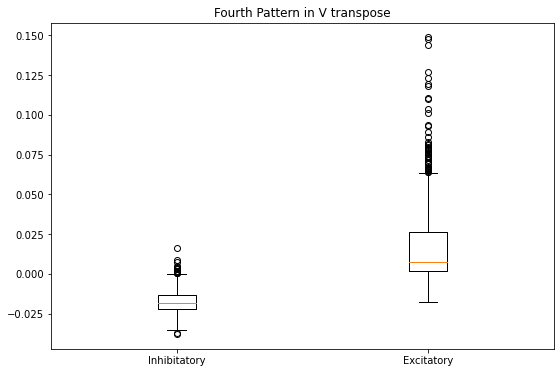

In [33]:
lists = [inhib4,excit4]

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(lists)

ax = ax.set_xticklabels(['Inhibitatory', 'Excitatory'])

plt.title('Fourth Pattern in V transpose')

The following code creates a boxplot for the sixth pattern in VT. It compares the Inhibitatory group and the Excitatory group.

Text(0.5, 1.0, 'Sixth Pattern in V transpose')

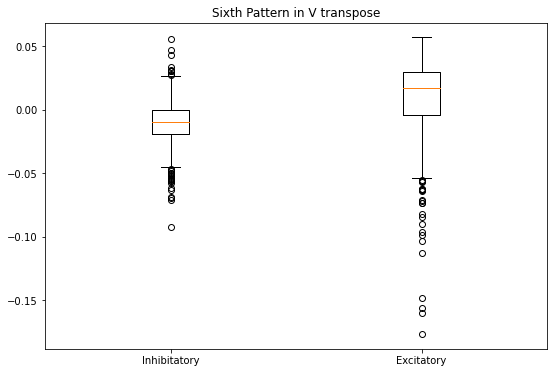

In [34]:
lists6 = [inhib6,excit6]

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(lists6)

ax = ax.set_xticklabels(['Inhibitatory', 'Excitatory'])

plt.title('Sixth Pattern in V transpose')

The following code calculates the hypergeometric p-value for pattern 4

In [35]:
countGroupI = 0 

# this loop finds the amount of values in both groups
# that are below zero
for i in range(len(v4)):
    if v4[i] < 0:
        countGroupI = countGroupI + 1
        
print("The number of values below 0 for both groups:", countGroupI)

countGroupE = 0 

# this loop finds the amount of values in both groups
# that are below zero
for i in range(len(v4)):
    if v4[i] > 0:
        countGroupE = countGroupE + 1
        
print("The number of values above 0 for both groups:", countGroupE)

The number of values below 0 for both groups: 889
The number of values above 0 for both groups: 628


In [36]:
countI = 0 

# this loop finds the amount of values in the inhibitatory group
# that are below zero
for i in range(len(inhib4)):
    if inhib4[i] < 0:
        countI = countI + 1
        
print("The number of values below 0 for Inhibitatory group:", countI)

countE = 0 

# this loop finds the amount of values in the excitatory group
# that are below zero
for i in range(len(excit4)):
    if excit4[i] > 0:
        countE = countE + 1
        
print("The number of values above 0 for Excitatory group:", countE)

The number of values below 0 for Inhibitatory group: 739
The number of values above 0 for Excitatory group: 611


The following code determines the hypergeometric p-value for the inhibitatory group and excitatory group of pattern 4

In [37]:
#Hypergeometric p-value for inhibitatory group pattern 4 
N = len(VT[4,:]) #number of cells
n = countGroupI  #number of cells with below 0 expression value
K = len(inhib4)  #number of inhibitatory cells
#number of inhibitatory cells with below 0 expression value
k = countI
#determines the amount of terms that will be added
summation_lim = n-k

pval = 0

# for loop creates the summation of the p-values from k to n.
from scipy.stats import hypergeom
for i in range((summation_lim)):
    pval = pval + hypergeom.sf((k+i), N, K, n)

print("p-value calculated by python is: ", pval)

p-value calculated by python is:  8.099565108689387e-253


In [38]:
#Hypergeometric p-value for excitatory group pattern 4 
N = len(VT[4,:]) #number of cells
n = countGroupE  #number of cells with above 0 expression value
K = len(excit4)  #number of excitatory cells
#number of excitatory cells with above 0 expression value
k = countE
#determines the amount of terms that will be added
summation_lim = n-k

pval = 0

# for loop creates the summation of the p-values from k to n.
from scipy.stats import hypergeom
for i in range((summation_lim)):
    pval = pval + hypergeom.sf((k+i), N, K, n)

print("p-value calculated by python is: ", pval)

p-value calculated by python is:  6.161757861519729e-252


The hypogeometric p-value is below 0.05e-251 for both groups. 
This means that the chance of these patterns occuring randomly are low.

The following code calculates the hypergeometric p-value for pattern 6

In [39]:
countGroupI = 0 

# this loop finds the amount of values in both groups
# that are below zero
for i in range(len(v6)):
    if v6[i] < 0:
        countGroupI = countGroupI + 1
        
print("The number of values below 0 for both groups:", countGroupI)

countGroupE = 0 

# this loop finds the amount of values in both groups
# that are below zero
for i in range(len(v6)):
    if v6[i] > 0:
        countGroupE = countGroupE + 1
        
print("The number of values above 0 for both groups:", countGroupE)

The number of values below 0 for both groups: 787
The number of values above 0 for both groups: 730


In [40]:
countI = 0 

# this loop finds the amount of values in the inhibitatory group
# that are below zero
for i in range(len(inhib6)):
    if inhib6[i] < 0:
        countI = countI + 1
        
print("The number of values below 0 for Inhibitatory group:", countI)

countE = 0 

# this loop finds the amount of values in the excitatory group
# that are below zero
for i in range(len(excit6)):
    if excit6[i] > 0:
        countE = countE + 1
        
print("The number of values above 0 for Excitatory group:", countE)

The number of values below 0 for Inhibitatory group: 572
The number of values above 0 for Excitatory group: 546


The following code determines the hypergeometric p-value for the inhibitatory group and excitatory group of pattern 6. 

In [41]:
#Hypergeometric p-value for inhibitatory group pattern 6 
N = len(VT[6,:]) #number of cells
n = countGroupI  #number of cells with below 0 expression value
K = len(inhib6)  #number of inhibitatory cells
#number of inhibitatory cells with below 0 expression value
k = countI
#determines the amount of terms that will be added
summation_lim = n-k

pval = 0

# for loop creates the summation of the p-values from k to n.
from scipy.stats import hypergeom
for i in range((summation_lim)):
    pval = pval + hypergeom.sf((k+i), N, K, n)

print("p-value calculated by python is: ", pval)

p-value calculated by python is:  1.6851721807140193e-80


In [42]:
#Hypergeometric p-value for excitatory group pattern 6
N = len(VT[6,:]) #number of cells
n = countGroupE  #number of cells with above 0 expression value
K = len(excit6)  #number of excitatory cells
#number of excitatory cells with above 0 expression value
k = countE
#determines the amount of terms that will be added
summation_lim = n-k

pval = 0

# for loop creates the summation of the p-values from k to n.
from scipy.stats import hypergeom
for i in range((summation_lim)):
    pval = pval + hypergeom.sf((k+i), N, K, n)

print("p-value calculated by python is: ", pval)

p-value calculated by python is:  1.8572090561581772e-80


The hypogeometric p-value is below 1.5e-80 for both groups. This means that the chance of these patterns occuring randomly are low.

The following code visualizes the fourth pattern in U. 

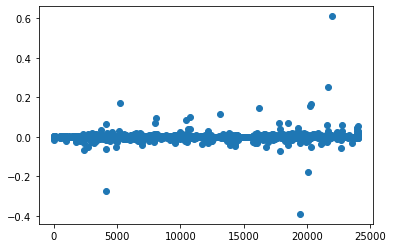

In [43]:
U4 = U[:,4]
Ux = np.arange(0,U.shape[0],1)
plt.scatter(Ux,U4)

The following code visualizes the sixth pattern in U.

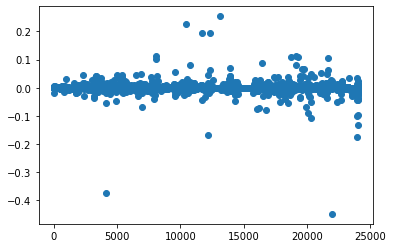

In [44]:
U6 = U[:,6]
Ux = np.arange(0,U.shape[0],1)
plt.scatter(Ux,U6)

The following code maps the gene name to the corresponding values in the fourth pattern of U

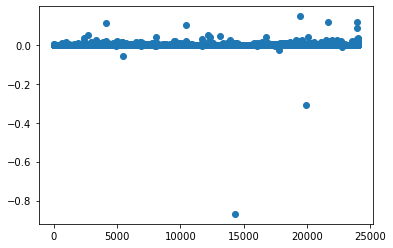

In [45]:
U1 = U[:,1]
Ux = np.arange(0,U.shape[0],1)
plt.scatter(Ux,U1)

In [46]:
gene_names = gene_rpkm.iloc[0]
gene_names.shape

(24057,)

In [64]:
gene_names_map_toU4 = {}

for i in range(U4.shape[0]):
    gene_names_map_toU4[gene_names.index[i]] = U4[i]
    
gene_names_map_toU4

{'0610005C13Rik': -5.276810987045306e-06,
 '0610007C21Rik': 0.003632215025868841,
 '0610007L01Rik': 3.639228019247136e-05,
 '0610007N19Rik': 2.405243570169964e-05,
 '0610007P08Rik': 1.5928597150498246e-05,
 '0610007P14Rik': 0.0006377139729194038,
 '0610007P22Rik': 0.0005297860725598627,
 '0610008F07Rik': 4.9055118475602684e-17,
 '0610009B14Rik': 2.6966353981360013e-06,
 '0610009B22Rik': 0.0006405423139581197,
 '0610009D07Rik': 0.0024532700816396174,
 '0610009L18Rik': -1.888675790933448e-05,
 '0610009O20Rik': 0.00039260121720890664,
 '0610010B08Rik': 0.0001368950780228338,
 '0610010F05Rik': -0.00014234478538352715,
 '0610010K14Rik': 0.0006227221603062173,
 '0610010O12Rik': -0.001961256847516894,
 '0610011F06Rik': 0.0009070842324884749,
 '0610011L14Rik': -0.0004242224293170454,
 '0610012G03Rik': -6.118492820817412e-05,
 '0610012H03Rik': -3.580932169525202e-07,
 '0610030E20Rik': -7.706994706684785e-07,
 '0610031J06Rik': -8.040889431987523e-05,
 '0610031O16Rik': -1.1853193744900894e-07,
 '

The following code maps the gene name to the corresponding values in the sixth pattern of U

In [65]:
gene_names_map_toU6 = {}

for i in range(U6.shape[0]):
    gene_names_map_toU6[gene_names.index[i]] = U6[i]
    
gene_names_map_toU6

{'0610005C13Rik': 7.178196278998479e-06,
 '0610007C21Rik': 0.0022863277909302205,
 '0610007L01Rik': 0.00019798211573132532,
 '0610007N19Rik': 9.092387932192269e-05,
 '0610007P08Rik': -3.78706783596825e-05,
 '0610007P14Rik': -0.001928280219172241,
 '0610007P22Rik': -6.336102956577995e-05,
 '0610008F07Rik': -2.572564825340856e-17,
 '0610009B14Rik': -6.161171552561318e-07,
 '0610009B22Rik': 0.0007629184641862869,
 '0610009D07Rik': 0.002061177013689005,
 '0610009L18Rik': -9.655828029492159e-06,
 '0610009O20Rik': -0.00011152308860601097,
 '0610010B08Rik': 0.0004358554298281347,
 '0610010F05Rik': 0.00011919158525205062,
 '0610010K14Rik': -0.000530527142160104,
 '0610010O12Rik': -0.001877481753186795,
 '0610011F06Rik': 0.002033662044305598,
 '0610011L14Rik': 1.9116133167809744e-05,
 '0610012G03Rik': 0.00011531866195443354,
 '0610012H03Rik': -5.144388845494696e-07,
 '0610030E20Rik': -3.302785130113584e-05,
 '0610031J06Rik': 0.00024382148112386064,
 '0610031O16Rik': -1.612399669528302e-07,
 '06

The following code sorts the values of U4 and U6.

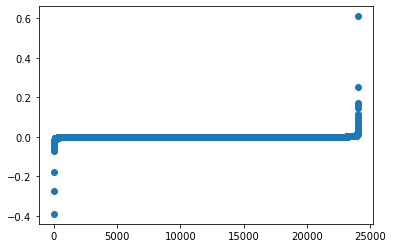

In [66]:
sorted_U4 = np.sort(U4)

plt.scatter(Ux,sorted_U4)

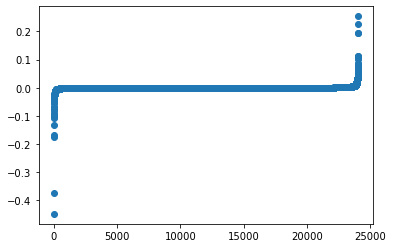

In [67]:
sorted_U6 = np.sort(U6)

plt.scatter(Ux,sorted_U6)

The following code sorts the dictionaries for the fourth and sixth pattern in U

In [68]:
#package that allows dictionaries to be sorted
import collections

# sorts the U4 values high to low
od4 = collections.OrderedDict(
    sorted(gene_names_map_toU4.items(), key=lambda x: x[1], reverse = True))

# sorted dictionary with U4 values as the keys 
# and the gene name as the value

In [69]:
#sorts the U4 values low to high
od4_low_to_high = collections.OrderedDict(
    sorted(gene_names_map_toU4.items(), key=lambda x: x[1], reverse = False))

# sorted dictionary with U4 values as the keys and 
# the gene name as the value

In [70]:
od4

OrderedDict([('Vip', 0.6107005522621279),
             ('Ubb', 0.2516751097985699),
             ('Cnr1', 0.17255647704057558),
             ('Tac2', 0.16728007007937454),
             ('Synpr', 0.15658407931763424),
             ('Penk', 0.14319647134828492),
             ('Mir690', 0.11654692542678045),
             ('Impact', 0.09869907126097992),
             ('Gad1', 0.09743841043145315),
             ('Hspa8', 0.08608006017346788),
             ('Resp18', 0.07121517668734828),
             ('Scg2', 0.06960961654848587),
             ('Fxyd6', 0.06903242489640152),
             ('Calb2', 0.06427125823321488),
             ('Zcchc12', 0.061990114963309306),
             ('Tubb2a', 0.058436540419715854),
             ('mt_GU332589', 0.05533207433582391),
             ('Slc6a1', 0.04556722422891659),
             ('mt_AF378830', 0.044031832114584314),
             ('mt_AK140265', 0.04237273491672589),
             ('Inpp5f', 0.03960826495920636),
             ('Rgs10', 0.039145857528

In [71]:
od4_low_to_high

OrderedDict([('Snap25', -0.3910514468756999),
             ('Calm2', -0.2758441253693865),
             ('Stmn1', -0.17665256922030007),
             ('Rgs4', -0.07154817777351832),
             ('Actb', -0.06876980123495056),
             ('Calm1', -0.06398803177639234),
             ('Ywhah', -0.05513996161707886),
             ('Aldoa', -0.05247925076927048),
             ('Tagln3', -0.05214048710211644),
             ('Chn1', -0.051691158522626235),
             ('Ppia', -0.04969987182421988),
             ('Nrn1', -0.04892550783058054),
             ('Enc1', -0.04407287024947581),
             ('Schip1', -0.04369108742294546),
             ('Ndrg3', -0.03980988137824019),
             ('Ldha', -0.03907019261966947),
             ('Tmsb4x', -0.0388133453544164),
             ('Npy', -0.03835191749615215),
             ('Pcp4', -0.0314804321832493),
             ('Malat1', -0.031199632329217727),
             ('Snca', -0.03106758528264423),
             ('c17_SSU-rRNA_Hsa', -0.03086

In [72]:
#package that allows dictionaries to be sorted
import collections

od6 = collections.OrderedDict(sorted(gene_names_map_toU6.items(),
                                   key=lambda x: x[1], reverse = True))

In [73]:
od6

OrderedDict([('Mir690', 0.2535695568425078),
             ('Hspa8', 0.22693950807391625),
             ('Mdh1', 0.1949800302820657),
             ('Ldhb', 0.194330559172076),
             ('Gad1', 0.11383010703554262),
             ('Slc25a5', 0.11270294794894652),
             ('Slc6a1', 0.10923105278441438),
             ('Serpini1', 0.10876884874770555),
             ('Ubc', 0.10372561249650276),
             ('Gapdh', 0.10039190000805955),
             ('Pkm2', 0.08869427903666097),
             ('Impact', 0.07977939298128538),
             ('Slc25a4', 0.07904677525091419),
             ('Ndrg4', 0.07017242737960232),
             ('Snrpn', 0.06611127110968515),
             ('Sparcl1', 0.06466054594827968),
             ('Mdh2', 0.06432503830566833),
             ('Ubb', 0.06242578842837258),
             ('Got1', 0.0562736680964299),
             ('Tmx2', 0.051816867261909816),
             ('Tubb2a', 0.050317890644853015),
             ('Tac1', 0.04990036998246285),
            

In [74]:
od6_low_to_high = collections.OrderedDict(sorted(gene_names_map_toU6.items(),
                                   key=lambda x: x[1], reverse = False))
od6_low_to_high

OrderedDict([('Vip', -0.4476536717362731),
             ('Calm2', -0.3748591795684149),
             ('mt_AK131579', -0.17482447654699396),
             ('Malat1', -0.16595799949207443),
             ('mt_AK165865', -0.13263790393719244),
             ('Tac2', -0.10736017029508987),
             ('mt_AF378830', -0.09963318540642026),
             ('mt_GU332589', -0.09559840825776944),
             ('Stmn1', -0.08895646260912662),
             ('Ppia', -0.07807624637708685),
             ('Pcp4', -0.07499448585798313),
             ('Penk', -0.07183539750571569),
             ('Sst', -0.07006124585615313),
             ('Enc1', -0.0669602903244754),
             ('Schip1', -0.05375372504300181),
             ('Calm1', -0.05370131948683324),
             ('Rgs4', -0.05050210583205252),
             ('Vsnl1', -0.049348004927144105),
             ('Tagln3', -0.04913872105365127),
             ('Chn1', -0.04715340761527708),
             ('Nrn1', -0.04709391280523419),
             ('Ywhah'

In [72]:
ordered_gene_to_U4_keys = list(od4.keys())
df_U4 = pd.DataFrame(ordered_gene_to_U4_keys)
df_U4.to_csv('df_U4.csv')

In [73]:
ordered_gene_to_U4_keys_lth = list(od4_low_to_high.keys())
df_U4 = pd.DataFrame(ordered_gene_to_U4_keys_lth)
df_U4.to_csv('df_U4_lth.csv')

In [74]:
ordered_gene_to_U6_keys = list(od6.keys())
df_U6 = pd.DataFrame(ordered_gene_to_U6_keys)
df_U6.to_csv('df_U6.csv')

In [75]:
ordered_gene_to_U6_keys_lth = list(od6_low_to_high.keys())
df_U6 = pd.DataFrame(ordered_gene_to_U6_keys_lth)
df_U6.to_csv('df_U6_lth.csv')

In [47]:
gene_names_map_toU3 = {}

for i in range(U3.shape[0]):
    gene_names_map_toU3[gene_names.index[i]] = U1[i]
    
gene_names_map_toU3

{'0610005C13Rik': -1.0015749871521943e-06,
 '0610007C21Rik': 0.0015142063387127503,
 '0610007L01Rik': 0.00019151578299476824,
 '0610007N19Rik': -2.7109468189981974e-06,
 '0610007P08Rik': 7.245383835729498e-05,
 '0610007P14Rik': 0.001484921437164945,
 '0610007P22Rik': 0.00033705236602134427,
 '0610008F07Rik': -3.1684175970911893e-17,
 '0610009B14Rik': 1.989328899587892e-06,
 '0610009B22Rik': 0.0010390298360392857,
 '0610009D07Rik': 0.0016479929333286835,
 '0610009L18Rik': 5.415359325292597e-06,
 '0610009O20Rik': 0.00026663532531613274,
 '0610010B08Rik': 0.00017015087710718426,
 '0610010F05Rik': 0.00026183304812038127,
 '0610010K14Rik': 0.0006231481006017115,
 '0610010O12Rik': 0.0014851106502341098,
 '0610011F06Rik': 0.0006885059344431132,
 '0610011L14Rik': 0.00032062335176103634,
 '0610012G03Rik': 0.0001072578742674738,
 '0610012H03Rik': 1.309490903709813e-07,
 '0610030E20Rik': 3.814032885298626e-05,
 '0610031J06Rik': 0.0007530624686087618,
 '0610031O16Rik': 1.9674134111337095e-08,
 '06

In [48]:
#package that allows dictionaries to be sorted
import collections

# sorts the U4 values high to low
od3 = collections.OrderedDict(
    sorted(gene_names_map_toU3.items(), key=lambda x: x[1], reverse = True))

# sorted dictionary with U4 values as the keys 
# and the gene name as the value

In [49]:
ordered_gene_to_U1_keys = list(od3.keys())
df_U3 = pd.DataFrame(ordered_gene_to_U3_keys)
df_U3.to_csv('df_U3.csv')

### The functions, processes and components that were determined to be most significant by Gorilla

#### U4

U4 process high to low (excitatory):
cytoplasmic translation                              2.73E-18  12.14 (21249,38,1013,22)
NADH dehydrogenase complex assembly                  1.68E-16  7.69 (21249,46,1562,26)
mitochondrial respiratory chain complex I assembly   1.68E-16  7.69 (21249,46,1562,26)
mitochondrial ATP synthesis coupled proton transport 2.96E-10  47.28 (21249,13,242,7) 
energy coupled proton transport                      4.18E-10  10.66 (21249,18,1329,12)
ATP synthesis coupled proton transport               4.18E-10  10.66 (21249,18,1329,12)
oxidative phosphorylation                            4.91E-9   10.73 (21249,19,1147,11)

U4 function high to low (excitatory):
proton-transporting ATP synthase activity, rotational mechanism 1.9E-12 39.23 (21249,15,325,9)
NADH dehydrogenase activity                          7.68E-11  10.98 (21249,21,1198,13)
glutamate decarboxylase activity                     7.07E-6   372.79 (21249,2,57,2)

U4 component high to low (excitatory):	
respiratory chain complex                            3.32E-26  8.88 (21249,69,1318,38)
mitochondrial proton-transporting ATP synthase complex  4.2E-10 9.39 (21249,15,1810,12)

U4 process low to high (inhibatory):
synaptic signaling                                   1.65E-15  2.95 (21249,275,1935,74)
trans-synaptic signaling                             2.04E-15  2.97 (21249,270,1935,73)
regulation of postsynapse organization               5.43E-16  5.04 (21249,132,1278,40)
regulation of neurotransmitter secretion             1.84E-14  3.38 (21249,133,2314,49)
anterograde trans-synaptic signaling                 2.21E-14  2.75 (21249,249,2139,69)
chemical synaptic transmission                       2.21E-14  2.75 (21249,249,2139,69)
vesicle-mediated transport in synapse                2.54E-14  4.35 (21249,129,1440,38)
regulation of synaptic vesicle exocytosis            6.79E-14  3.78 (21249,102,2314,42)
regulation of synaptic vesicle transport             9.05E-14  3.69 (21249,107,2314,43)
regulation of dendritic spine morphogenesis          1.73E-13  4.99 (21249,55,2244,29)
regulation of regulated secretory pathway            2.54E-13  2.89 (21249,190,2244,58)
presynaptic endocytosis                              4.58E-9   7.76 (21249,48,856,15)
synaptic vesicle endocytosis                         4.58E-9   7.76 (21249,48,856,15)
glutamate receptor signaling pathway
negative regulation of synaptic transmission, GABAergic 2.57E-7 21271,39,1490,15 

U4 function low to high (inhibatory):
structural constituent of synapse                    5.74E-13  7.00 (21249,30,2025,20)
structural constituent of cytoskeleton               3.78E-11  5.12 (21249,64,1622,25)
translation initiation factor activity               4.14E-9   4.73 (21249,47,2007,21)
structural constituent of postsynapse                1.57E-7   6.65 (21249,20,1916,12)

U4 component low to high (inhibatory):
glutamatergic synapse                                4.53E-54  3.49(21249,505,2244,186)
neuron spine                                         3.59E-24  4.37 (21249,188,1734,67)
dendritic spine                                      3.76E-24  4.42 (21249,183,1734,66)
Schaffer collateral - CA1 synapse                    9.11E-21  4.47 (21249,113,2231,53)
mitochondrial protein complex 7.16E-8 2.17 (21271,253,2205,57)

#### U6

U6 process high to low (excitatory):
organonitrogen compound biosynthetic process         1.18E-45  2.81(21249,837,2018,223)
respiratory electron transport chain                 1.91E-37  25.03 (21249,60,467,33)
peptide biosynthetic process                         1.18E-32  3.76(21249,289,2052,105)
mitochondrial respiratory chain complex assembly     2.61E-30  6.67 (21249,82,1981,51)
NADH dehydrogenase complex assembly                  3.56E-28  12.36 (21249,46,1196,32)
mitochondrial respiratory chain complex I assembly   3.56E-28  12.36 (21249,46,1196,32)
ATP synthesis coupled proton transport               4.82E-20  75.75 (21249,18,187,12)
tricarboxylic acid cycle                             2.75E-19  30.62 (21249,32,347,16)
mitochondrial ATP synthesis coupled proton transport 4.19E-16  94.91 (21249,13,155,9)

U6 function high to low (excitatory):
ATPase activity, coupled to transmembrane movement of ions, rotational mechanism
9.45E-25   31.65 (21249,36,373,20)
proton-transporting ATP synthase activity, rotational mechanism 
3.74E-20   101.85 (21249,15,153,11)
NADH dehydrogenase activity                          4.05E-19  19.16 (21249,21,898,17)
proton-transporting ATPase activity, rotational mechanism 
5.66E-13 27.25      (21249,23,373,11)

U6 component high to low (excitatory):
myelin sheath                                        1.28E-63  26.33 (21249,187,246,57)
respiratory chain complex                            7.92E-54  26.30 (21249,69,527,45)
NADH dehydrogenase complex                           3.63E-40  19.72 (21249,42,898,35) 
proton-transporting ATP synthase complex             3.62E-19  83.33 (21249,15,187,11)


U6 process low to high (inhibatory):
regulation of synapse organization                   2.96E-28  3.67 (21249,276,1995,95)
regulation of postsynapse organization               2.32E-20  4.56 (21249,132,1873,53)
regulation of dendritic spine development            9.17E-18  6.17 (21249,96,1292,36)
regulation of dendrite morphogenesis                 7.59E-15  4.08 (21249,116,1975,44)
regulation of synapse assembly                       1.04E-12  3.94 (21249,124,1609,37)
regulation of synaptic vesicle cycle                 1.9E-11   3.07 (21249,145,2151,45)
glutamate receptor signaling pathway                 2.33E-10  8.22 (21249,39,1060,16)
negative regulation of dendrite development          3.81E-10  5.33 (21249,36,2214,20)
negative regulation of dendritic spine development   8.36E-9   9.35 (21249,16,1562,11)

U6 function low to high (inhibatory):
structural constituent of synapse                    2.78E-7   5.66 (21249,30,1753,14)
syntaxin-1 binding                                   9.23E-7   5.52 (21249,27,1852,13)
structural constituent of postsynapse                3.07E-6   8.26 (21249,20,1158,9)
glutamate receptor binding                           4.93E-12  8.66 (21249,66,706,19)
calmodulin binding                                   7.99E-12  2.73 (21249,192,2269,56)


U6 component low to high (inhibatory):
postsynaptic specialization                          1.46E-32  3.77(21249,336,1796,107)
postsynaptic density                                 1.71E-32  3.79(21249,331,1796,106)
dendritic spine                                      3.11E-24  4.69 (21249,183,1560,63)
neuron spine                                         1.76E-23  4.56 (21249,188,1560,63)
synaptic vesicle membrane                            3.01E-10  4.91 (21249,65,1598,24)

#### U1 Excitatory

Process: NADH dehydrogenase complex assembly
ATP synthesis coupled proton transport
mitochondrial respiratory chain complex I assembly

Function:
NADH dehydrogenase activity
ATPase activity, coupled to transmembrane movement of ions, rotational mechanism
cytochrome-c oxidase activity

Component:
respiratory chain complex
NADH dehydrogenase complex
proton-transporting two-sector ATPase complex, catalytic domain